In [ ]:
#ANALISIS DATA SLEEP HEALTH AND LIFESTYLE

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [9]:
# 1. MUAT & LIHAT DATA

In [6]:
df = pd.read_csv("F:/Data Kuliah/Sleep_health_and_lifestyle_dataset.csv")
print("🔍 Bentuk Data:", df.shape)
print("\n📋 Contoh Data:")
display(df.head())
print("\n📄 Info Tipe Data:")
print(df.info())

🔍 Bentuk Data: (374, 13)

📋 Contoh Data:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea



📄 Info Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
Non

In [10]:
# 2. ANALISIS AWAL TARGET (Sleep Disorder)


🎯 Distribusi Gangguan Tidur:
Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64


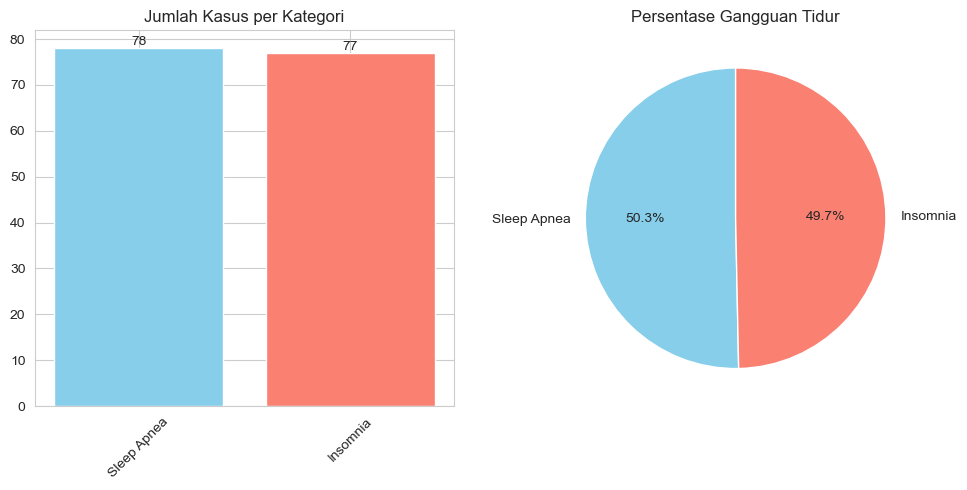

In [11]:
print("\n🎯 Distribusi Gangguan Tidur:")
target_counts = df['Sleep Disorder'].value_counts()
print(target_counts)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
bars = plt.bar(target_counts.index, target_counts.values, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Jumlah Kasus per Kategori')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Persentase Gangguan Tidur')

plt.tight_layout()
plt.show()


In [13]:
# 3. ANALISIS VARIABEL NUMERIK PENTING

In [19]:
print("\n📈 Statistik Variabel Numerik Penting:")
print(df[['Age', 'Sleep Duration', 'Quality of Sleep', 'Stress Level', 'Physical Activity Level']].describe())


📈 Statistik Variabel Numerik Penting:
              Age  Sleep Duration  Quality of Sleep  Stress Level  \
count  374.000000      374.000000        374.000000    374.000000   
mean    42.184492        7.132086          7.312834      5.385027   
std      8.673133        0.795657          1.196956      1.774526   
min     27.000000        5.800000          4.000000      3.000000   
25%     35.250000        6.400000          6.000000      4.000000   
50%     43.000000        7.200000          7.000000      5.000000   
75%     50.000000        7.800000          8.000000      7.000000   
max     59.000000        8.500000          9.000000      8.000000   

       Physical Activity Level  
count               374.000000  
mean                 59.171123  
std                  20.830804  
min                  30.000000  
25%                  45.000000  
50%                  60.000000  
75%                  75.000000  
max                  90.000000  


In [15]:
# Pilih beberapa variabel untuk dilihat distribusinya

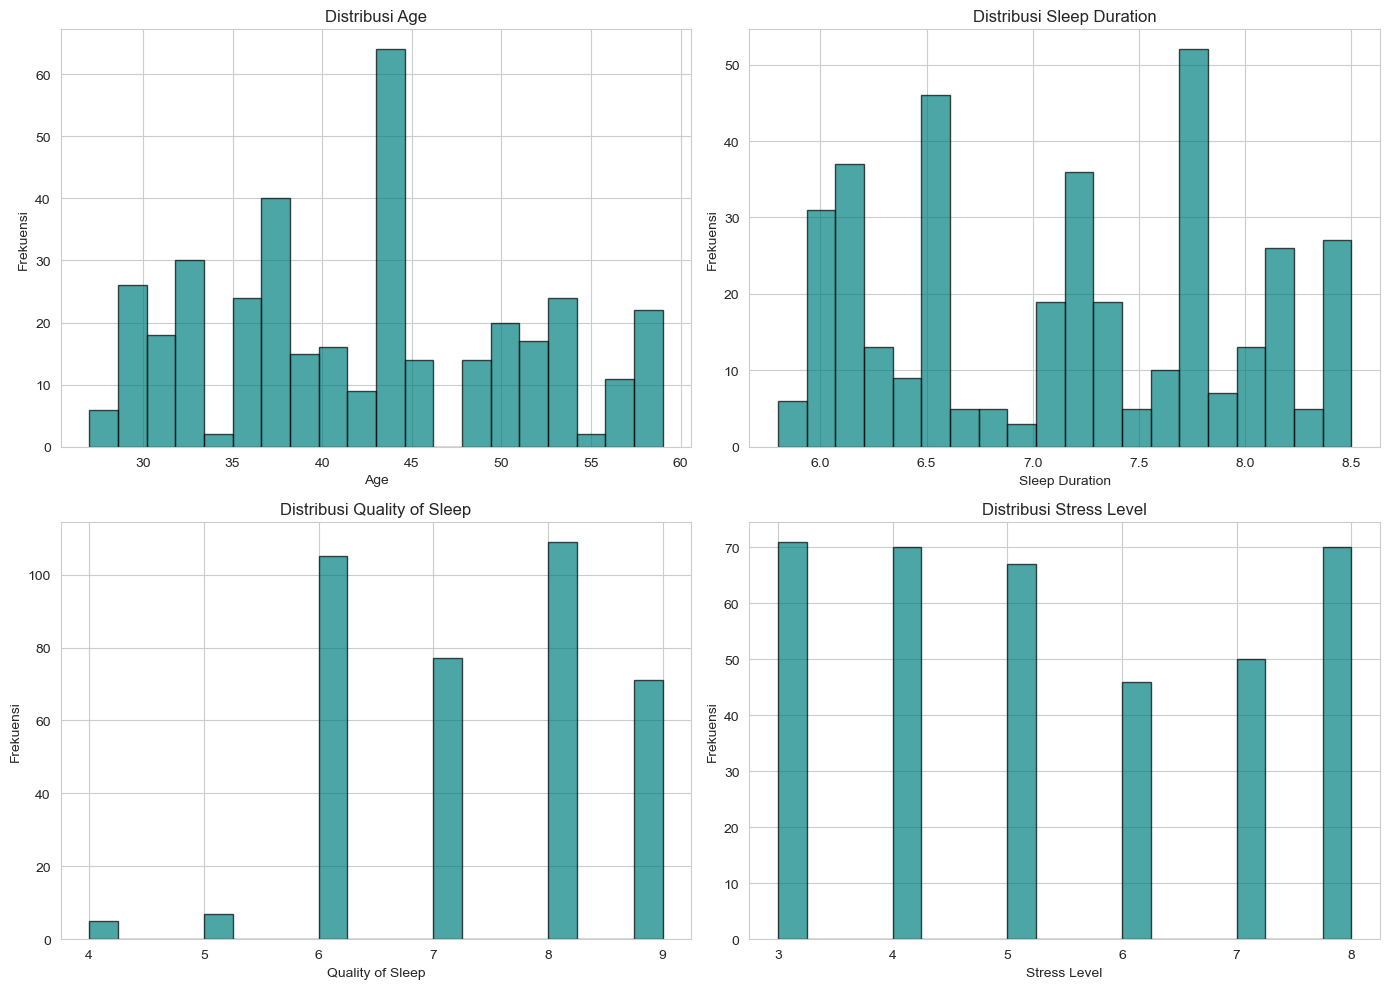

In [16]:
numeric_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Stress Level']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel() # Rata-kan array axes

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7, color='teal')
    axes[idx].set_title(f'Distribusi {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

In [17]:
# 4. HUBUNGAN ANTAR VARIABEL (Contoh: Sleep Duration vs. Quality of Sleep)


🔗 Hubungan Sleep Duration vs. Quality of Sleep:


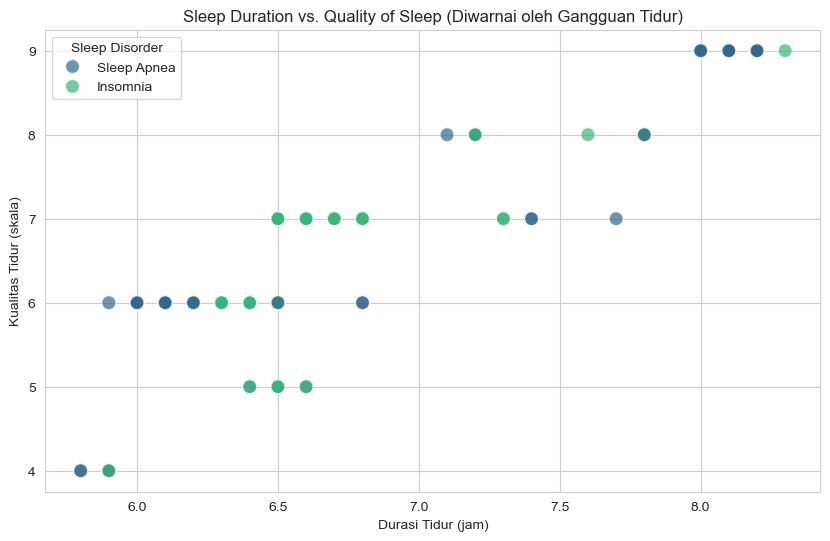

In [18]:
print("\n🔗 Hubungan Sleep Duration vs. Quality of Sleep:")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sleep Duration', y='Quality of Sleep', hue='Sleep Disorder', palette='viridis', s=100, alpha=0.7)
plt.title('Sleep Duration vs. Quality of Sleep (Diwarnai oleh Gangguan Tidur)')
plt.xlabel('Durasi Tidur (jam)')
plt.ylabel('Kualitas Tidur (skala)')
plt.legend(title='Sleep Disorder')
plt.show()

In [20]:
# Pisahkan tekanan darah menjadi numerik

In [21]:
df['Systolic_BP'] = df['Blood Pressure'].str.split('/').str[0].astype(int)
df['Diastolic_BP'] = df['Blood Pressure'].str.split('/').str[1].astype(int)

# Pilih kolom numerik untuk korelasi
numeric_df = df[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP']]

In [22]:
# Pilih kolom numerik untuk korelasi

In [23]:
numeric_df = df[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP']]


In [24]:
# Hitung & gambar heatmap

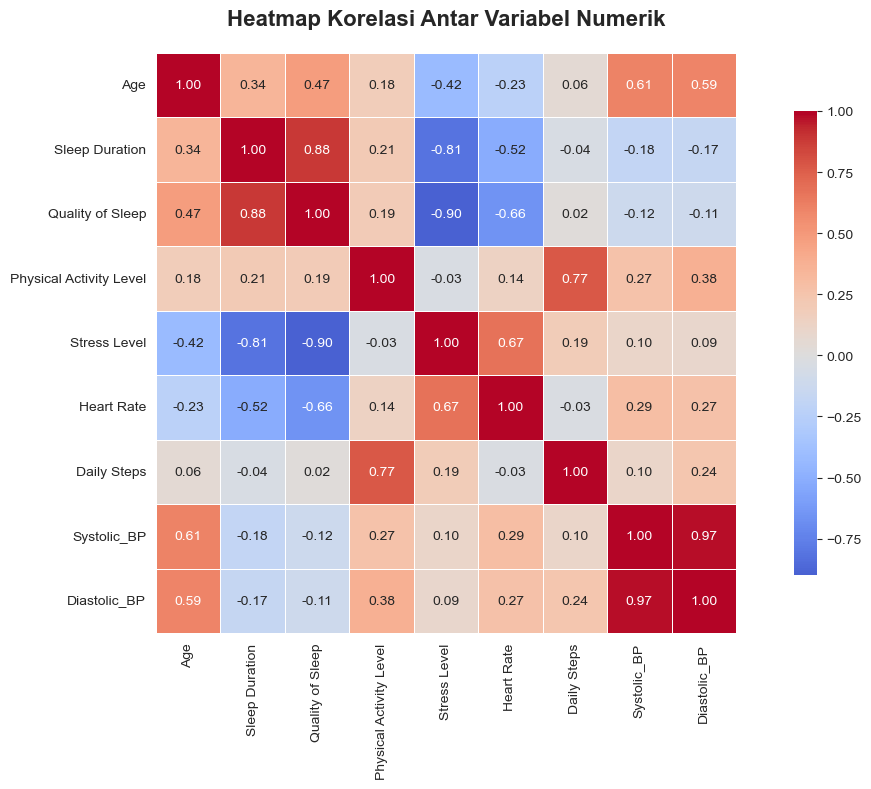

In [25]:
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Heatmap Korelasi Antar Variabel Numerik', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


In [26]:
# Tampilkan korelasi terkuat dengan 'Quality of Sleep' dan 'Stress Level'

In [27]:
print("\n🔗 Korelasi TERKUAT dengan 'Quality of Sleep':")
print(correlation_matrix['Quality of Sleep'].sort_values(ascending=False).head(6))
print("\n🔗 Korelasi TERKUAT dengan 'Stress Level':")
print(correlation_matrix['Stress Level'].sort_values(ascending=False).head(6))


🔗 Korelasi TERKUAT dengan 'Quality of Sleep':
Quality of Sleep           1.000000
Sleep Duration             0.883213
Age                        0.473734
Physical Activity Level    0.192896
Daily Steps                0.016791
Diastolic_BP              -0.110151
Name: Quality of Sleep, dtype: float64

🔗 Korelasi TERKUAT dengan 'Stress Level':
Stress Level               1.000000
Heart Rate                 0.670026
Daily Steps                0.186829
Systolic_BP                0.102818
Diastolic_BP               0.091811
Physical Activity Level   -0.034134
Name: Stress Level, dtype: float64


C:\Users\zdnrm\AppData\Local\Temp\ipykernel_13604\2174367194.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='BMI Category', y='Quality of Sleep', ax=axes[0], palette='Set2')
C:\Users\zdnrm\AppData\Local\Temp\ipykernel_13604\2174367194.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_occ, x='Occupation', y='Stress Level', ax=axes[1], palette='Set3')


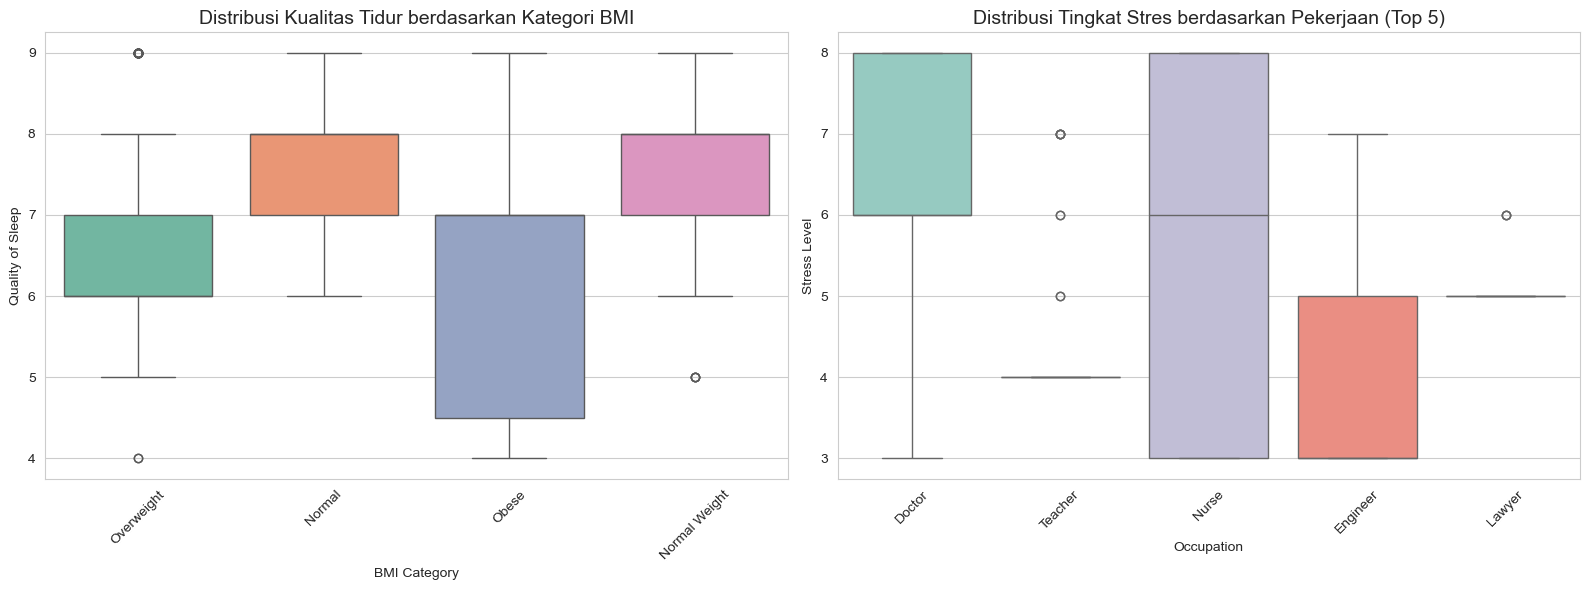


📊 PERSENTASE GANGGUAN TIDUR per Kategori BMI:


Sleep Disorder,Insomnia,Sleep Apnea
BMI Category,,
Normal,58.33,41.67
Normal Weight,50.00,50.00
Obese,40.00,60.00
Overweight,49.61,50.39


In [34]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Diagram 1: Kualitas Tidur berdasarkan BMI Category
sns.boxplot(data=df, x='BMI Category', y='Quality of Sleep', ax=axes[0], palette='Set2')
axes[0].set_title('Distribusi Kualitas Tidur berdasarkan Kategori BMI', fontsize=14)
axes[0].set_xlabel('BMI Category')
axes[0].set_ylabel('Quality of Sleep')
axes[0].tick_params(axis='x', rotation=45)

# Diagram 2: Tingkat Stres berdasarkan Pekerjaan (Top 5)
top_occupations = df['Occupation'].value_counts().head(5).index
df_top_occ = df[df['Occupation'].isin(top_occupations)]
sns.boxplot(data=df_top_occ, x='Occupation', y='Stress Level', ax=axes[1], palette='Set3')
axes[1].set_title('Distribusi Tingkat Stres berdasarkan Pekerjaan (Top 5)', fontsize=14)
axes[1].set_xlabel('Occupation')
axes[1].set_ylabel('Stress Level')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Hitung persentase gangguan tidur per kategori BMI
print("\n📊 PERSENTASE GANGGUAN TIDUR per Kategori BMI:")
bmi_disorder_pct = pd.crosstab(df['BMI Category'], df['Sleep Disorder'], normalize='index') * 100
display(bmi_disorder_pct.round(2))

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 5.1. Siapkan Fitur (X) dan Target (y)
# Hapus kolom yang tidak digunakan sebagai fitur
X = df.drop(['Sleep Disorder', 'Person ID', 'Blood Pressure'], axis=1)
y = df['Sleep Disorder'] # Target yang akan kita prediksi

# 5.2. Pisahkan kolom numerik dan kategorikal
numeric_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                    'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP']
categorical_features = ['Gender', 'Occupation', 'BMI Category']

# 5.3. Buat Preprocessor (Pipelines untuk transformasi)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features), # Scaling data numerik
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features) # Encoding data kategori
    ])

# 5.4. Transformasi Data
X_processed = preprocessor.fit_transform(X)
print(f"✅ Bentuk fitur setelah preprocessing: {X_processed.shape}")

# 5.5. Encode Target Variable (ubah teks jadi angka)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("🔢 Kode untuk Target:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# 5.6. Bagi Data menjadi Train (80%) dan Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2,
                                                    random_state=42, stratify=y_encoded)
print(f"\n📐 Pembagian Dataset:")
print(f"   - Data Latih (Training): {X_train.shape[0]} sampel")
print(f"   - Data Uji (Testing): {X_test.shape[0]} sampel")

✅ Bentuk fitur setelah preprocessing: (374, 23)
🔢 Kode untuk Target: {'Insomnia': np.int64(0), 'Sleep Apnea': np.int64(1), nan: np.int64(2)}

📐 Pembagian Dataset:
   - Data Latih (Training): 299 sampel
   - Data Uji (Testing): 75 sampel


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [38]:
# Inisialisasi dan latih model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
# Prediksi pada data uji
y_pred = rf_model.predict(X_test)


In [42]:
# 6.2. Evaluasi Model
print("="*60)
print("EVALUASI MODEL RANDOM FOREST")
print("="*60)

EVALUASI MODEL RANDOM FOREST


In [43]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Akurasi Model pada Data Uji: {accuracy:.2%}")


🎯 Akurasi Model pada Data Uji: 92.00%


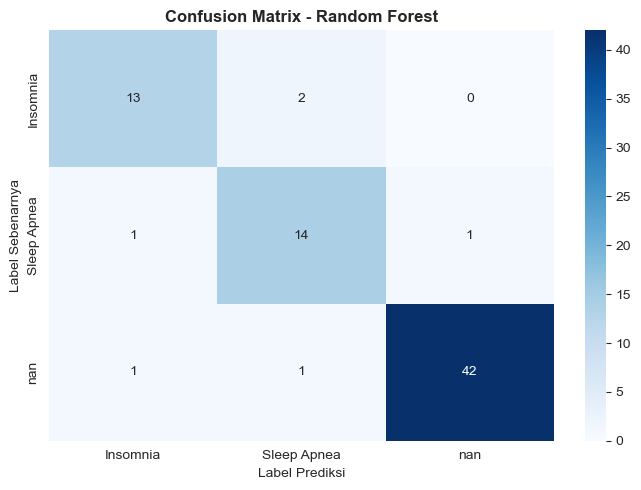

In [45]:
# 6.3. Visualisasi Confusion Matrix
plt.figure(figsize=(7, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Random Forest', fontweight='bold')
plt.ylabel('Label Sebenarnya')
plt.xlabel('Label Prediksi')
plt.tight_layout()
plt.show()

In [46]:
# Dapatkan nama fitur setelah OneHotEncoding
cat_encoder = preprocessor.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_features, cat_feature_names])


In [47]:
# Buat DataFrame untuk importance
feature_importance_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

C:\Users\zdnrm\AppData\Local\Temp\ipykernel_13604\1936423945.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='importance', y='feature', palette='rocket')


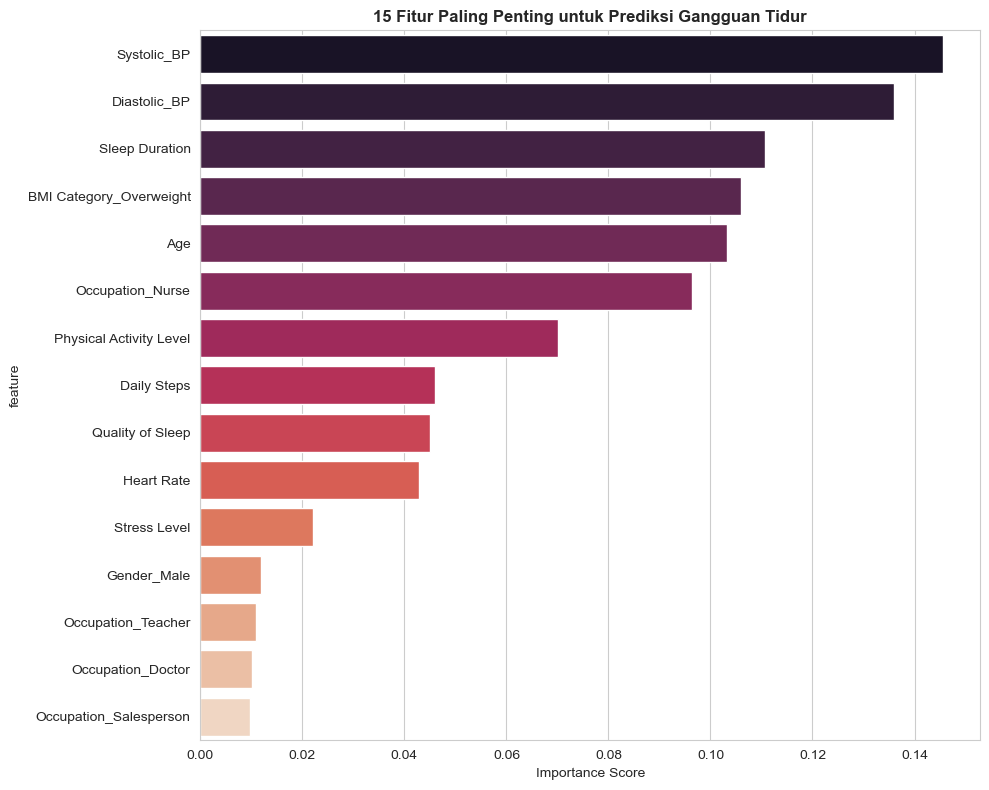


🏆 TOP 5 FITUR PALING PENTING:
   Systolic_BP: 0.1456
   Diastolic_BP: 0.1360
   Sleep Duration: 0.1107
   BMI Category_Overweight: 0.1060
   Age: 0.1033


In [48]:
# Plot 15 fitur terpenting
plt.figure(figsize=(10, 8))
top_features = feature_importance_df.head(15)
sns.barplot(data=top_features, x='importance', y='feature', palette='rocket')
plt.title('15 Fitur Paling Penting untuk Prediksi Gangguan Tidur', fontweight='bold')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("\n🏆 TOP 5 FITUR PALING PENTING:")
for i, row in feature_importance_df.head().iterrows():
    print(f"   {row['feature']}: {row['importance']:.4f}")